In [24]:
import pandas as pd
import numpy as np
%matplotlib inline

### Importing and reformatting the data we are working with

In [25]:
# load data from csv file
school_enrollment = pd.read_csv("school-enrollment-by-detailed-level-of-school-for-the-population-3-years-and-over.csv", 
                                       index_col="Neighborhood")

#Reformat
schooldata = school_enrollment.loc[:,["Estimate; Not enrolled in school"]]
schooldata.head()

,Estimate; Not enrolled in school
Neighborhood,
Allegheny Center,995.0
Allegheny West,282.0
Allentown,1555.0
Arlington,1396.0
Arlington Heights,173.0


### Adding population & Unenrolled per Capita

If we only look at the number of people not in school, we completely ignore the fact that **more people = more not enrolled**. Thus, we will look at the ratio of unenrolled to people. We add the population onto our data frame, and, from here, we divide the number of unenrolled by the estimated population to get the number of unenrolled per person in the neighborhood.

In [26]:
population = school_enrollment.loc[:,"Estimate; Total:"]
schooldata["Not Enrolled per Capita"] = school_enrollment.loc[:,"Estimate; Not enrolled in school"]/school_enrollment.loc[:,"Estimate; Total:"]
schooldata.head()

,Estimate; Not enrolled in school,Not Enrolled per Capita
Neighborhood,,
Allegheny Center,995.0,0.716343
Allegheny West,282.0,0.822157
Allentown,1555.0,0.617063
Arlington,1396.0,0.765771
Arlington Heights,173.0,0.812207


### Filter
This is filtering by ratio. Dropping all neighborhoods with a ratio 0.5 and higher. 

In [27]:
schdatafilter = schooldata
squerry_mask = schdatafilter["Not Enrolled per Capita"] < .5
schfilter = schdatafilter[squerry_mask]
schfilter.head()
schfilter.sort_values(by=["Not Enrolled per Capita"])

,Estimate; Not enrolled in school,Not Enrolled per Capita
Neighborhood,,
Central Oakland,1166.0,0.200275
North Oakland,2373.0,0.248092
Terrace Village,949.0,0.416776
Bluff,2664.0,0.423597
South Oakland,1312.0,0.450859
Squirrel Hill North,5171.0,0.467034


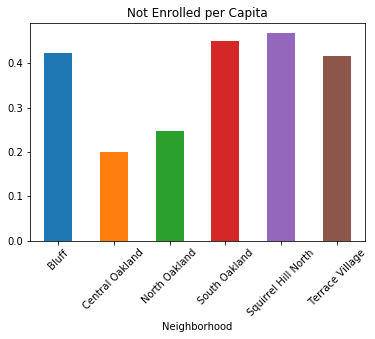

In [28]:
schfilter.loc[:,'Not Enrolled per Capita'].plot(kind="bar", title = "Not Enrolled per Capita", rot=45)